# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [23]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'D:/Philip/100daysAI/Day_004/Part01'

### 之前做過的處理

In [24]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [25]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH']= abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH']=app_train['DAYS_BIRTH'].apply(lambda x:x/365)

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [9]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

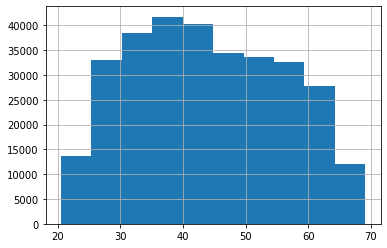

In [10]:
app_train['DAYS_BIRTH'].hist()

In [13]:
bincut=[20,30,40,50,60,70]
app_train['DAYS_BIRTH_GROUP']=pd.cut(app_train['DAYS_BIRTH'],bins=bincut)
app_train['DAYS_BIRTH_GROUP'].value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: DAYS_BIRTH_GROUP, dtype: int64

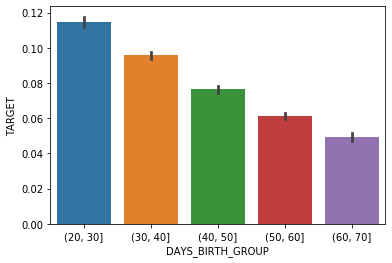

In [16]:
import seaborn as sns # 另一個繪圖-樣式套件
sns.barplot(app_train['DAYS_BIRTH_GROUP'],app_train['TARGET'])
plt.show()

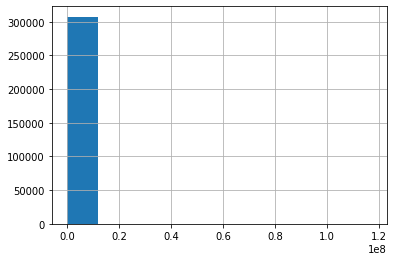

In [17]:
app_train['AMT_INCOME_TOTAL'].hist()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


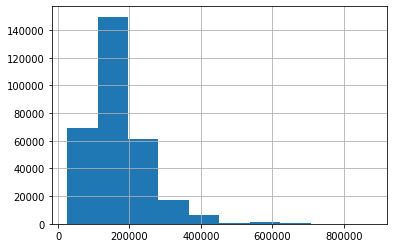

In [29]:
income_std=np.std(app_train['AMT_INCOME_TOTAL'])
income_mean=np.mean(app_train['AMT_INCOME_TOTAL'])
print(app_train['AMT_INCOME_TOTAL'].describe())
app_new_income=app_train[app_train['AMT_INCOME_TOTAL']<(income_mean+3*income_std)]
app_new_income['AMT_INCOME_TOTAL'].hist()

In [30]:
app_new_income['AMT_INCOME_TOTAL_ADJUST']=app_new_income['AMT_INCOME_TOTAL'].apply(lambda x : x/10000)
app_new_income['AMT_INCOME_TOTAL_ADJUST'].describe()


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    307057.000000
mean         16.668881
std           8.757655
min           2.565000
25%          11.250000
50%          14.400000
75%          20.250000
max          87.750000
Name: AMT_INCOME_TOTAL_ADJUST, dtype: float64

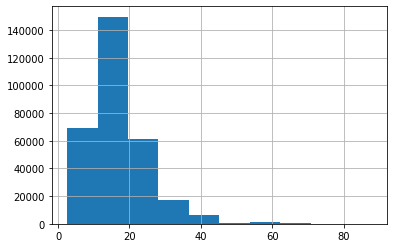

In [31]:
app_new_income['AMT_INCOME_TOTAL_ADJUST'].hist()

In [32]:
bincut2=[0,20,40,60,80]
app_new_income['AMT_INCOME_TOTAL_CUT']=pd.cut(app_new_income['AMT_INCOME_TOTAL_ADJUST'],bins=bincut2)
app_new_income['AMT_INCOME_TOTAL_CUT'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(0, 20]     219596
(20, 40]     79852
(40, 60]      6456
(60, 80]      1031
Name: AMT_INCOME_TOTAL_CUT, dtype: int64

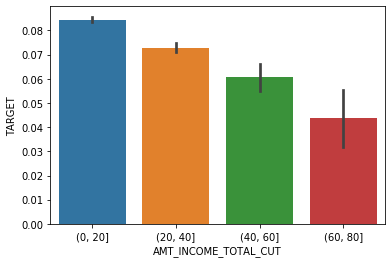

In [33]:
sns.barplot(app_new_income['AMT_INCOME_TOTAL_CUT'],app_new_income['TARGET'])
plt.show()
#由下列數據發現收入低的人比較容易成為TARGET